In [ ]:
#pip install bnlearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import bnlearn as bn


In [ ]:
caminho_arquivo = '/content/Dados_Jakarta_2020_13_maio_21_final.csv'

df = pd.read_csv(caminho_arquivo)

df['DATA'] = df['system:index'].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:8]} {x[8:10]}:00:00")

# Convertendo a nova coluna para datetime
df['DATA'] = pd.to_datetime(df['DATA'], format='%Y-%m-%d %H:%M:%S')

df = df.drop(['system:index', '.geo'], axis=1)


(array([1.327e+03, 1.330e+02, 1.160e+02, 8.600e+01, 6.900e+01, 4.300e+01,
        4.400e+01, 3.400e+01, 2.900e+01, 2.400e+01, 2.000e+01, 2.200e+01,
        1.100e+01, 9.000e+00, 7.000e+00, 2.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  0.80333335,  1.60666669,  2.41000004,  3.21333338,
         4.01666673,  4.82000008,  5.62333342,  6.42666677,  7.23000011,
         8.03333346,  8.83666681,  9.64000015, 10.4433335 , 11.24666684,
        12.05000019, 12.85333354, 13.65666688, 14.46000023, 15.26333357,
        16.06666692, 16.87000027, 17.67333361, 18.47666696, 19.28000031,
        20.08333365, 20.886667  , 21.69000034, 22.49333369, 23.29666704,
        24.10000038]),
 <BarContainer object of 30 artists>)

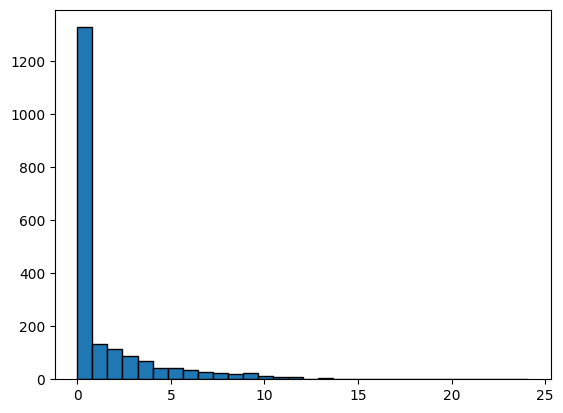

In [ ]:

plt.hist(df['precipitation'], bins=30, edgecolor='black')  # bins define o número de intervalos


In [ ]:
# Definir a variável para aplicar o K-Means
X = df[['temperature']]

# Definir o número de clusters (grupos) que você deseja
n_clusters = 2  # Exemplo: 3 grupos para 'Low', 'Moderate', 'High'

# Aplicar o K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['temperature_cluster'] = kmeans.fit_predict(X)

# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_
print("Centróides de 'temperature':", centroids)

# Atribuir rótulos aos clusters de temperatura com base nos centróides
df['temperature_cluster_label'] = df['temperature_cluster'].map({
    0: 'Low',      # Cluster com centróide 301.41
    1: 'High'      # Cluster com centróide 303.54
})


Centróides de 'temperature': [[303.44143476]
 [301.71427482]]


In [ ]:
# Definir a variável para aplicar o K-Means
X = df[['humidity']]

# Definir o número de clusters (grupos) que você deseja
n_clusters = 3  # Exemplo: 3 grupos para 'Low', 'Moderate', 'High'

# Aplicar o K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['humidity_cluster'] = kmeans.fit_predict(X)

# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_
print("Centróides de 'humidity':", centroids)

# Atribuir rótulos aos clusters de temperatura com base nos centróides
df['humidity_cluster_label'] = df['humidity_cluster'].map({
    0: 'Low',      # Cluster com centróide 301.41
    2: 'Moderate', # Cluster com centróide 302.44
    1: 'High'      # Cluster com centróide 303.54
})

Centróides de 'humidity': [[42.02398082]
 [54.18769552]
 [62.69293924]]


In [ ]:
# Definir a variável para aplicar o K-Means
X = df[['pressure']]

# Definir o número de clusters (grupos) que você deseja
n_clusters = 3  # Exemplo: 3 grupos para 'Low', 'Moderate', 'High'

# Aplicar o K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['pressure_cluster'] = kmeans.fit_predict(X)

# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_
print("Centróides de 'pressure':", centroids)

# Atribuir rótulos aos clusters de temperatura com base nos centróides
df['pressure_cluster_label'] = df['pressure_cluster'].map({
    1: 'Moderate',      # Cluster com centróide 100780.13
    0: 'low', # Cluster com centróide 100970.50
    2: 'High'      # Cluster com centróide 101148.99
    })


Centróides de 'pressure': [[100757.73469447]
 [100969.98133022]
 [101162.74635858]]


In [ ]:
# Definir a variável para aplicar o K-Means
X = df[['cloudCover']]

# Definir o número de clusters (grupos) que você deseja
n_clusters = 4  # Exemplo: 3 grupos para 'Low', 'Moderate', 'High'

# Aplicar o K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['cloudCover_cluster'] = kmeans.fit_predict(X)

# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_
print("Centróides de 'pressure':", centroids)

# Atribuir rótulos aos clusters de temperatura com base nos centróides
df['cloudCover_label'] = df['cloudCover_cluster'].map({
      0: 'Very Low',
      1: 'Low',
      3: 'High',
      2: 'Very High'})


Centróides de 'pressure': [[0.03002759]
 [0.37475862]
 [4.0999999 ]
 [1.21370371]]


In [ ]:
df['precipitation_cluster'] = np.where(df['precipitation'] > 0, 1, 0)


In [ ]:
df.head()


,cloudCover,date,humidity,precipitation,pressure,temperature,DATA,temperature_cluster,temperature_cluster_label,humidity_cluster,humidity_cluster_label,pressure_cluster,pressure_cluster_label,cloudCover_cluster,cloudCover_label,precipitation_cluster
0,1.36,2020-01-01,66.0,12.0,101352.859375,301.704010,2020-01-01 00:00:00,1,High,2,Moderate,2,High,3,High,1
1,0.53,2020-01-01,61.0,0.8,101108.703125,301.878998,2020-01-01 06:00:00,1,High,2,Moderate,2,High,1,Low,1
2,0.38,2020-01-01,69.0,1.8,101434.226562,301.585999,2020-01-01 12:00:00,1,High,2,Moderate,2,High,1,Low,1
3,0.36,2020-01-01,70.0,3.7,101218.632812,301.494995,2020-01-01 18:00:00,1,High,2,Moderate,2,High,1,Low,1
4,0.23,2020-01-02,65.0,5.9,101402.132812,302.322998,2020-01-02 00:00:00,1,High,2,Moderate,2,High,1,Low,1


In [ ]:
df_preparado = df[['temperature_cluster', 'humidity_cluster', 'pressure_cluster', 'cloudCover_cluster', 'precipitation_cluster', 'DATA']]


In [ ]:
len(df_preparado)


1985

In [ ]:
df_preparado.to_csv('df_discretizado_por_k_kmeans_com_data')

In [ ]:
max

<function max>

In [ ]:
max

<function max>

In [ ]:
max(df_preparado['DATA'])

Timestamp('2021-05-12 18:00:00')